In [49]:
from fractions import Fraction
from functools import reduce
from itertools import product
from operator import mul

import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from matplotlib_venn import venn3
from sympy import Eq, Rational, Symbol
from sympy.stats import Bernoulli, Binomial, density, Die, E, P, variance

__Теория вероятностей__ - математическая наука, изучающая закономерности случайных явлений. Под случайными явлениями понимаются явления с неопределенным исходом, происходящие при неоднократном воспроизведении определенного комплекса условий.

__Математическая статистика__ - раздел математики, изучающий математические методы сбора, систематизации, обработки и интерпретации результатов наблюдений с целью выявления статистических закономерностей.
<br>Математическая статистика опирается на теорию вероятностей. Если теория вероятностей изучает закономерности случайных явлений на основе абстрактного описания действительности (теоретической вероятностной модели), то математическая статистика оперирует непосредственно результатами наблюдений над случайным явлением, представляющими выборку из некоторой конечной или гипотетической бесконечной генеральной совокупности.

***
### __Классификация событий__

__Случайным событием__ (возможным событием или просто событием) называется любой факт, который в результате испытания может произойти или не произойти.
<br>Под испытанием (опытом, экспериментом) в этом определении понимается выполнение определенного комплекса условий, в которых наблюдается то или иное явление, фиксируется тот или иной результат.

События называются __несовместными__ (несовместимыми), если наступление одного из них исключает наступление любого другого. В противном случае события называются __совместными__ (совместимыми).

Событие называется __достоверным__ (обозначаем буквой $\Omega$), если в результате испытания оно обязательно должно произойти.
<br>Событие называется __невозможным__ (обозначаем символом $\varnothing$), если в
результате испытания оно вообще не может произойти.

События называются __равновозможными__, если в результате испытания по условиям симметрии ни одно из этих событий не является объективно более возможным.

__Пример__. Бросается правильная игральная кость с $20$ гранями. Найти вероятность события число выпавших очков кратно $3$.

In [2]:
sum(1 for x in range(1, 21) if not x % 3) / 20

0.3

__Пример__. Бросается правильная игральная кость с $6$ гранями два раза подряд. Найти вероятность события сумма результатов бросков не меньше $7$.

In [3]:
omega = np.array([i + j for i in range(1, 7) for j in range(1, 7)])
omega

array([ 2,  3,  4,  5,  6,  7,  3,  4,  5,  6,  7,  8,  4,  5,  6,  7,  8,
        9,  5,  6,  7,  8,  9, 10,  6,  7,  8,  9, 10, 11,  7,  8,  9, 10,
       11, 12])

In [4]:
(omega >= 7).sum() / len(omega)

0.5833333333333334

Несколько событий называются __единственно возможными__, если в результате испытания обязательно должно произойти хотя бы одно из них. Например, события, состоящие в том, что в семье из двух детей: $A$ - «два мальчика», $B$ - «один мальчик, одна девочка», $C$ - «две девочки» - являются единственно возможными.

Несколько событий образуют __полную группу__ (полную систему), если они являются единственно возможными и несовместными исходами испытания. Это означает, что _в результате испытания обязательно должно произойти одно и только одно из этих событий_. $A,B,C$ выше образуют полную группу. 

***
### __Классическое определение вероятности__

Численная мера степени объективной возможности наступления события называется __вероятностью события__.

Пусть исходы некоторого испытания образуют полную группу событий и равновозможны, т.е

* единственно возможны, 
* несовместны и 
* равновозможны. 

Такие исходы называются __элементарными исходами__, случаями или шансами.

Случай называется __благоприятствующим__ (благоприятным) событию $A$, если появление этого случая влечет за собой появление события $A$.

Согласно __классическому определению__ вероятность события $A$ равна отношению числа случаев, благоприятствующих ему, к общему числу случаев, т.е.

$$P(A) = \frac{m}{n},$$

где $P(A)$ - вероятность события $A$; $m$ - число случаев, благоприятствующих событию $A$; $n$ - общее число случаев.


Классическое определение (классическую формулу) вероятности следует рассматривать не как определение, а как метод вычисления вероятностей для испытаний, сводящихся к схеме случаев.

__Свойства вероятности события__:

* $0 < P(A) < 1$
* $P(\Omega) = 1$
* $P(\varnothing) = 0$

__Статистической вероятностью__ события $A$ называется относительная частота (частость) появления этого события в $n$ произведенных испытаниях, т.е.

$$\tilde{P}(A) = \omega(A) = \frac{m}{n},$$

где $\tilde{P}(A)$ - статистическая вероятность события $A$; $\omega(A)$ - относительная частота (частость) события $A$; $m$ - число испытаний, в которых появилось событие $A$; $n$ - общее число испытаний.

__Геометрической вероятностью__ события $A$ называется отношение меры области (_measure_), благоприятствующей появлению события $A$, к мере всей области, т.е.

$$P(A) = \frac{\textbf{mes}\,g}{\textbf{mes}\,G},$$

Классический пример - __задача о встрече__. Пусть двое, скажем, Петя и Маша, условились встретиться в определенном месте между 10 и 11 часами. Пришедший первым ждет другого в течение 10 минут, и, если так и не дожидается, уходит. Какова вероятность того, что Петя и Маша встретятся, если каждый из них приходит независимо от другого в любое время в течение указанного часа?


$\Omega = [0, 1] \times [0, 1]$. Пусть Петя пришел в момент времени $x \in [0, 1]$, а Маша пришла в момент времени $y \in [0, 1]$. Для того, чтобы они встретились, нужно, чтобы между временем прихода Пети и Маши прошло не более 10 минут (1/6 часа). Это значит, что встрече благоприятствуют те элементарные исходы $(x,y) \in \Omega$, для которых

$$|x - y| \leqslant \frac{1}{6} \Leftrightarrow -\frac{1}{6} \leqslant x - y \leqslant \frac{1}{6}$$

Интересующая нас область ограничена прямыми $y = x \pm \frac{1}{6}$

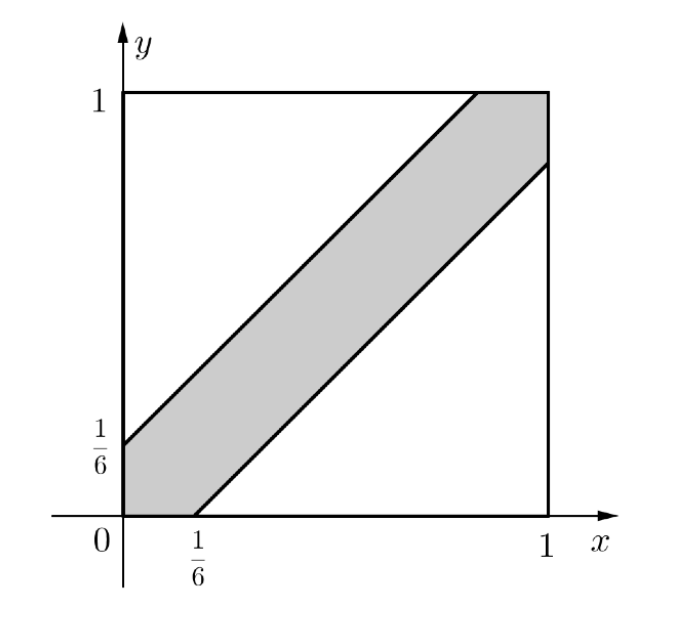

$$\lambda(A) = 1 - \biggl(\frac{5}{6}\biggr)^2 = \frac{11}{36},\,P(A) = \frac{\lambda(A)}{\lambda(\Omega)} = \frac{11}{36}.$$

In [5]:
def meetingProba(r):
    # r is a time/frame ratio
    if r < 0 or r > 1:
        raise ValueError('Incorrect ratio')
    return 1 - (1 - r)**2

In [6]:
Fraction(meetingProba(1/6)).limit_denominator()

Fraction(11, 36)

***
### __Действия над событиями__

__Суммой__ нескольких событий называется событие, состоящее в наступлении хотя бы одного из данных событий.

__Произведением__ нескольких событий называется событие, состоящее в совместном наступлении всех этих событий.

__Разностью__ $(A-B)$ двух событий $A$ и $B$ называется событие, которое состоится, если событие $A$ произойдет, а
событие $B$ не произойдет.

__Задача__. Определить истинность утверждений:

$$(A \cup B) \setminus C = (A \setminus C) \cup (B \setminus C)
\\ (A \cap B) \cup C = (A \cap C) \cup (B \cap C)
\\ (A \cap B) \setminus C = (A \setminus C) \cap B
\\ (A \cap B) \cup C = (A \cup C) \cap (B \cup C)$$

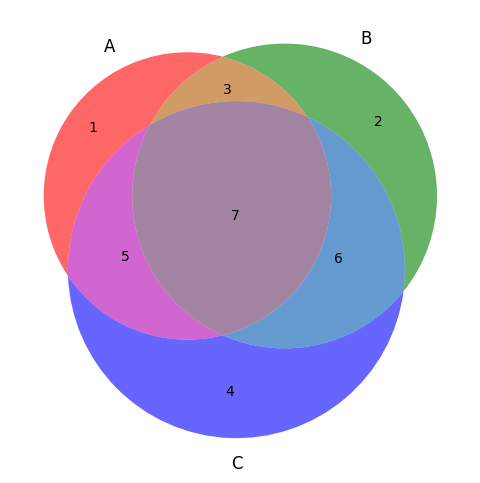

In [7]:
plt.figure(figsize=(6, 6))
venn3(subsets=(range(1, 8)), set_labels=('A', 'B', 'C'), alpha=.6)
plt.show()

In [8]:
A = {1, 3, 7, 5}
B = {3, 2, 6, 7}
C = {5, 7, 6, 4}

In [9]:
(A | B) - C == (A - C) | (B - C)

True

In [10]:
(A & B) | C == (A & C) | (B & C)

False

In [11]:
(A & B) - C == (A - C) & B

True

In [12]:
(A & B) | C == (A | C) & (B | C)

True

__Законы де Моргана__:
$$\overline{A+B+...+K} = \overline{A} \cdot \overline{B} \cdot ... \cdot \overline{K}$$

$$\overline{AB...K} = \overline{A} + \overline{B} + ... + \overline{K}$$

__Теорема сложения вероятностей__. Вероятность суммы конечного числа _несовместных_ событий равна сумме вероятностей этих событий:
$$P(A+B+...+K) = P(A) + P(B) +...+ P(K)$$

***
### __Условная вероятность события__

Вероятность $P(B)$ как мера степени объективной возможности наступления события $B$ имеет смысл при выполнении определенного комплекса условий. При изменении условий вероятность события $B$ может измениться. Так, если к комплексу условий, при котором изучалась вероятность $P(B)$, добавить новое условие $A$, то полученная вероятность события $B$, найденная при условии, что событие $A$ произошло, называется __условной вероятностью__ события $B$ и обозначается $P(B|A)$. 

$$P(B|A) = \frac{P(AB)}{P(A)}$$

$$P(AB) = P(A) \cdot P(B|A) = P(B) \cdot P(A|B)$$

__Теорема (правило) умножения вероятностей__. Вероятность произведения двух событий равна произведению вероятности одного из них на условную вероятность другого, найденную в предположении, что первое событие произошло.

Два события называются __независимыми__, если появление одного из них не меняет вероятности наступления другого.

Для независимых событий теорема (правило) умножения вероятностей для двух событий примет вид:

$$P(AB) = P(A)\,P(B)$$

Если событие независимо от самого себя, то $P(A)\,P(A) = 0$ или $1$, т.е. $A$ либо невозможное, либо достоверное.

Вероятность суммы двух _совместных_ событий равна сумме вероятностей этих событий без вероятности их произведения, т.е.
$$P(A+B) = P(A) + P(B) - P(AB)$$

Вероятность суммы нескольких _совместных_ событий $A,B,...,K$ равна разности между единицей и вероятностью произведения противоположных событий $\overline{A},\overline{B},...,\overline{K}$:

$$P(A+B+...+K) = 1 - P(\overline{A} \cdot \overline{B} \cdot ... \cdot \overline{K})$$

Если $A,B,...,K$ - _независимые_:

$$P(A+B+...+K) = 1 - P(\overline{A}) \cdot P(\overline{B}) \cdot ... \cdot P(\overline{K})$$

***
### __Формула полной вероятности. Формула Байеса__

Если событие $F$ может произойти только при условии появления одного из событий (гипотез) $A_1,A_2,...,A_n$, образующих полную группу, то вероятность события $F$ равна сумме произведений вероятностей каждого из этих событий (гипотез) на соответствующие условные вероятности события $F$:

$$P(F) = \sum_{i=1}^{n}\,P(A_i)\,P(F|A_i)$$

Следствием теоремы умножения и формулы полной вероятности
является __формула Байеса__.
<br>Она применяется, когда событие $F$, которое может появиться только с одной из гипотез $A_1,A_2,...,A_n$, образующих полную группу событий, __произошло__ и необходимо произвести количественную __переоценку__ _априорных_ вероятностей этих гипотез $P(A_1),P(A_2),...,P(A_n)$, известных до испытания, т.е. надо найти
_апостериорные_ (получаемые после проведения испытания) условные вероятности гипотез $P(A_1|F),P(A_2|F),...,P(A_n|F)$.

По теореме умножения вероятностей

$$P(FA_i) = P(F)\,P(A_i|F) = P(A_i)\,P(F|A_i)$$

$$P(A_i|F) = \frac{P(A_i)\,P(F|A_i)}{P(F)}$$

С учетом формулы полной вероятности

$$P(A_i|F) = \frac{P(A_i)\,P(F|A_i)}{\sum_{i=1}^{n}\,P(A_i)\,P(F|A_i)}$$

Значение формулы Байеса состоит в том, что при появлении события $F$, т.е. по мере поступления данных, получения новой информации, мы можем проверять и корректировать выдвинутые до испытания гипотезы (принятые решения, предполагаемые модели), основываясь на переходе от их априорных вероятностей к апостериорным.

Если условные вероятности $P(F|A_i)\,(i=1,2,...,n)$ постоянны, т.е. на вероятность события $F$ все гипотезы влияют одинаково, то согласно формуле Байеса получаем $P(A_i|F) = P(A_i)$, т.е. дополнительная информация о появлении события $F$ не имеет никакой ценности, поскольку не меняет наших представлений об априорных вероятностях гипотез.

__Прим__. $P(F|A_i) = \text{const}$ выносится из-под суммы и сокращается, а сумма вероятностей полной группы гипотез равна единице.

__Задача__. В торговую фирму поступили телевизоры от трех поставщиков в отношении $1:4:5$. Практика показала, что телевизоры, поступающие от $1$-го, $2$-го и $3$-го поставщиков, не потребуют ремонта в течение гарантийного срока соответственно в $98$, $88$ и $92\%$ случаев.

1. Найти вероятность того, что поступивший в торговую фирму телевизор не потребует ремонта в течение гарантийного срока.
2. Проданный телевизор потребовал ремонта в течение гарантийного срока. От какого поставщика вероятнее всего поступил этот телевизор?

__Решение__.
<br> __Вопрос 1__. Обозначим события:
<br>$A_i$ - телевизор поступил в торговую фирму от $i$-го поставщика $(i=1,2,3)$;
<br>$F$ - телевизор не потребует ремонта в течение гарантийного срока.

$$P(A_1) = \frac{1}{1+4+5} = 0,1 \quad P(F|A_1) = 0,98;$$

$$P(A_2) = \frac{4}{1+4+5} = 0,4 \quad P(F|A_2) = 0,88;$$

$$P(A_3) = \frac{5}{1+4+5} = 0,5 \quad P(F|A_3) = 0,92.$$

По формуле полной вероятности

$$P(F) = \sum_{i=1}^{3} P(A_i)\,P(F|A_i) = 0,91.$$

__Вопрос 2__. Событие $\overline{F}$ - телевизор потребует ремонта в течение гарантийного срока.

$$P(\overline{F}) = 1 - P(F) = 1 - 0,91 = 0,09.$$

$$P(\overline{F}|A_1) = 1 - 0,98 = 0,02;$$

$$P(\overline{F}|A_2) = 1 - 0,88 = 0,12;$$

$$P(\overline{F}|A_3) = 1 - 0,92 = 0,08;$$

По формуле Байеса

$$\underbrace{P(A_i|\overline{F})}_{апостериорная} = \frac{\overbrace{P(A_i)}^{априорная}\,P(\overline{F}|A_i)}{P(\overline{F})}$$

$$P(A_1|\overline{F}) = \frac{0,1 \cdot 0,02}{0,09} = 0,022$$

$$P(A_2|\overline{F}) = \frac{0,4 \cdot 0,12}{0,09} = 0,533$$

$$P(A_3|\overline{F}) = \frac{0,5 \cdot 0,08}{0,09} = 0,444$$

Таким образом, после наступления события $\overline{F}$ вероятность гипотезы $A_2$ увеличилась с $P(A_2) = 0,4$ до максимальной $P(A_2|\overline{F}) = 0,533$, а гипотезы $A_3$ - уменьшилась от максимальной $P(A_3) = 0,5$ до $P(A_3|\overline{F}) = 0,444$. Если ранее (до наступления события $\overline{F}$) наиболее вероятной была гипотеза $A_3$, то теперь, в свете новой информации (наступления события $\overline{F}$), наиболее вероятна гипотеза $A_2$ - поступление данного телевизора от $2$-го поставщика.

__Задача__. Вероятность попадания в мишень первым стрелком $0,4$, вторым - $0,2$. Каждый произвел по одному выстрелу. В мишень попала одна пуля. Определить вероятность того, что мишень поразил первый стрелок.

$$P_1 = 0,4 \quad P_2 = 0,2 \quad P_A^{\text{prior}} = P_1\overline{P_2} \quad P_B^{\text{prior}} = \overline{P_1}P_2$$

$$P_A^{\text{prior}} + P_B^{\text{prior}} = 0,4 \cdot (1-0,2) + (1-0,4) \cdot 0,2 = 0,32 + 0,12 = 0,44.$$

Пересчет априорной вероятности сценария $A$ в свете того, что поражение мишени - достоверный факт:
$$P_A^{\text{post}} + P_B^{\text{post}} = P(\Omega) = 1 \Rightarrow P_A^{\text{post}} = \frac{P_A^{\text{prior}}}{0,44} = \frac{0,32}{0,44} = 0,727.$$

Другими словами, требуется пересчитать пропорциональный вклад в сумму слагаемого, соответствующего реализации сценария $A$, - при условии, что сумма изменилась с $0,44$ до $1$ - в $\frac{1}{0,44} \approx 2,27$ раз.

***
### __Случайная величина и математическое ожидание__

__Случайной величиной__ $X$ называется функция, заданная на множестве элементарных исходов (или в пространстве элементарных событий), т.е.

$$X = f(\omega),$$

где $\omega$ - элементарный исход (или элементарное событие, принадлежащее пространству $\Omega$, т.е. $\omega \in \Omega$).

_Как думать про случайные величины в контексте data science?_
<br>Представим таблицу: по вертикали UserID, по горизонтали - признаки ${A,B,...,Z}$. На пересечении - значение признака для пользователя. Признаки в данном случае это случайные величины, а их значения - реализации на объектах, конкретных пользователях.

__Законом распределения__ случайной величины называется всякое соотношение, устанавливающее связь между возможными значениями случайной величины и соответствующими им вероятностями.

__Математическим ожиданием__ $M(X)$ дискретной случайной величины Х называется сумма произведений всех ее значений на соответствующие им вероятности:

$$M(X) = \sum_{i=1}^{n} x_i p_i.$$

Математическое ожидание рассматривают как характеристику положения случайной величины, ее центр распределения.
<br>Последний термин связан с __механической интерпретацией математического ожидания__. Если предположить, что каждая материальная точка с абсциссой $x_i$ имеет массу, равную $p_i\,(i=1,2,...,n)$, а вся единичная масса $\sum_{i=1}^{n} p_i = 1$ распределена между этими точками, то математическое ожидание представляет собой абсциссу центра масс системы материальных точек.

__Свойства математического ожидания__:
* $M(C) = C$
* $M(kX) = kM(X)$
* $M(X \pm Y) = M(X) \pm M(Y)$
* $M(XY) = M(X) \cdot M(Y)$ 
<br>(математическое ожидание произведения конечного числа __независимых__ случайных величин равно произведению их математических ожиданий)

__Задача__. Случайная величина $X$ - остаток от деления на $3$ того числа, которое выпало на честном шестигранном кубике. Найти $\text{E}(X)$.

In [13]:
X = np.arange(1, 7) % 3
p = np.array([1/6] * 6)
X @ p

1.0

__Задача__. Найти матожидание с.в. - суммы выпавших очков в результате $10$-кратного подбрасывания честного шестигранного кубика.

In [14]:
X = np.arange(1, 7)
p = np.array([1/6] * 6)
10*X @ p

35.0

In [15]:
E(10*Die('D'))

35

Случайные величины $X$ и $Y$ называются __равными__, если $X(\omega) = Y(\omega), \forall \omega \in \Omega$.

__Пример__. Дано вероятностное пространство, соответствующее одному броску честной монеты.
* Случайная величина $X$ определена так: $X(\text{орел}) = 1, X(\text{решка}) = 0;$
* Случайная величина $Y$ определена так: $Y(\text{орел}) = 0, Y(\text{решка}) = 5.$

Верно ли, что $X + \frac{1}{5}Y = 1$?


In [16]:
X = np.array([1, 0])
Y = np.array([0, 5])
(X + Y/5 == 1).all()

True

__Задача__. Пусть $L$ - с.в., равная разности результатов первого и второго броска честного шестигранного кубика. Проверить утверждения:

$$P(L = 0,5) = \frac{1}{9} \quad P(L = -2) = \frac{1}{9}$$

$$P(L = 0) = \frac{1}{6} \quad P(L = 3) = \frac{5}{36}$$

In [17]:
def testStatement(rv, value, proba):
    counts = dict(zip(*np.unique(rv, return_counts=True)))
    return counts.get(value, False) / len(rv) == proba

In [18]:
L = [i - j for i in range(1, 7) for j in range(1, 7)]
data = (1/2, 1/9), (-2, 1/9), (0, 1/6), (3, 5/36)
[testStatement(L, *point) for point in data]

[False, True, True, False]

__Задача__. С.в. $X$ - число, выпавшее на честном кубике при однократном подбрасывании. С.в. $Y$ - суммарное число решек, выпавших за $3$ подбрасывания честной монеты. С.в. $Z$ - суммарное число орлов, выпавших за эти же $3$ подбрасывания честной монеты. По определению, $p_{(2X)}(12)$ это вероятность того, что с.в. $2X$ примет значение $12$. Проверить утверждения:

$$p_X(2) = \frac{1}{6} \quad p_Y(3) = \frac{1}{8}$$

$$p_Z(0) = 0 \quad p_{(2X)}(12) = \frac{1}{6}$$

Проверим каждое утверждение двумя инструментами: __`standard lib + numpy`__ и __`sympy`__.

In [19]:
testStatement(range(1, 7), 2, 1/6)

True

In [20]:
testStatement(2 * np.arange(1, 7), 12, 1/6)

True

In [21]:
X = Die('X')  # честный шестигранный кубик

In [22]:
P(Eq(X, 6)) == P(Eq(2*X, 12)) == Rational(1, 6)

True

In [23]:
density(X).dict[6] == density(2*X).dict[12] == Rational(1, 6)

True

In [24]:
omega = product(range(2), repeat=3)
coin_rv = [sum(seq) for seq in omega]
coin_rv

[0, 1, 1, 2, 1, 2, 2, 3]

In [25]:
testStatement(coin_rv, 3, 1/8)

True

In [26]:
testStatement(coin_rv, 0, 0)

False

В __`sympy.stats`__ есть готовый класс монеты __`Coin`__, но многократное подбрасывание удобнее моделировать биномиальным распределением:

In [27]:
n = Symbol('n', positive=True, integer=True)
C = Binomial('C', n, Rational(1, 2), 'Орел', 'Решка')
dens = density(C).dict.subs(n, 3)
dens.doit()

{3*Решка: 1/8, Орел + 2*Решка: 3/8, 2*Орел + Решка: 3/8, 3*Орел: 1/8}

In [28]:
dens = dens.subs({'Орел': 0, 'Решка': 1}).doit()
dens

{3: 1/8, 2: 3/8, 1: 3/8, 0: 1/8}

Тот же результат можно получить, если при инициализации __`C`__ вместо строковых меток __`Орел`__ и __`Решка`__ сразу прописать числа.

In [29]:
dens[3] == Rational(1, 8)

True

In [30]:
dens[0] == 0

False

__Задача__. Проверить новые утверждения для с.в. $X,Y,Z$ из предыдущей задачи. 

In [31]:
rv = [x - y for x, y in product(range(1, 7), coin_rv)]
testStatement(rv, 0, 7/48)

True

In [32]:
Y = np.array(coin_rv)
Z = 3 - Y  # complimentary
testStatement(Y - Z, 1, 3/8)

True

***
### __Независимость случайных величин__

Случайные величины $X$ и $Y$ независимы, если

$$\forall a,b \in \R : P(X = a \cap Y = b) = P(X = a) \cdot P(Y = b).$$

Две случайные величины называются __независимыми__, если закон распределения одной из них не меняется от того, какие возможные значения приняла другая величина.

__Задача__. Даны $5$ совместно независимых случайных величин $X_1,...,X_5$, имеющих одинаковое распределение

$$P(X_i = 0) = 0,25 \quad P(X_i = 1) = 0,75$$

Найти распределение с.в. $X_1 \cdot ... \cdot X_5$.

__Способ 1__. Словарь __`d`__  ниже задает распределение числа успехов в $n$ испытаниях по схеме Бернулли. Успех в данном случае кодирует единица (значение по умолчанию в конструкторе класса __`sympy.stats.Binomial`__):

In [33]:
n, p = 5, .75
X = Binomial('X', n, p)
d = density(X).dict
d

{0: 0.000976562500000000,
 1: 0.0146484375000000,
 2: 0.0878906250000000,
 3: 0.263671875000000,
 4: 0.395507812500000,
 5: 0.237304687500000}

Вероятность того, что во всех $5$ испытаниях выпадет единица:

In [34]:
d[5]

0.237304687500000

Во всех остальных случаях произведение обнулится из-за наличия в нем хотя бы одного $0$. Вероятность обнуления:

In [35]:
1 - d[5]

0.762695312500000

__Способ 2__. Соберем распределение из произведения пяти "бернуллей" и посмотрим на его функцию вероятности (pmf, probability mass function):

In [36]:
Xs = [Bernoulli(f'X{i}', p) for i in range(n)]
density(reduce(mul, Xs))

{0: 0.762695312500000, 1: 0.237304687500000}

__Способ 3__. Запрограммируем однорукого бандита из $5$ барабанов на $1$ ноль и $3$ единицы каждый, повторяя заданное условием соотношение $q:p=1:3$, и посмотрим, в какой доле случаев произведение чисел выпавшей комбинации будет единицей (обратится в ноль):

In [37]:
omega = [reduce(mul, seq) for seq in product([1]*3 + [0], repeat=5)]
values, counts = np.unique(omega, return_counts=True)

In [38]:
values

array([0, 1])

In [39]:
counts

array([781, 243], dtype=int64)

In [40]:
counts / counts.sum()

array([0.76269531, 0.23730469])

***
### __Дисперсия дискретной случайной величины__

Дисперсией $D(X)$ случайной величины $X$ называется математическое ожидание квадрата ее отклонения от математического ожидания:

$$D(X) = M[X - M(X)]^2$$

$$D(X) = \sum_{i=1}^{n} (x_i - a)^2 p_i,\,a = M(X).$$

__Свойства дисперсии__:
* $D(C) = 0$
* $D(kX) = k^2D(X)$
* $D(X) = M(X^2) - [M(X)]^2$
* $D(X \pm Y) = D(X) + D(Y)$
<br>(внимание на знак в правой части)

__Задача__. Найти дисперсию с.в. - суммы выпавших очков в результате двукратного подбрасывания правильной игральной кости.

In [41]:
dice = [Die(f'D{i}') for i in (1, 2)]
variance(sum(dice))

35/6

В силу равновероятности исходов:

In [42]:
values = range(1, 7)
x = np.array([i + j for i in values for j in values])
x.var()

5.833333333333333

Без группировки вероятностей одинаковых исходов:

In [43]:
p = np.array([1/36] * 36)
(x - x @ p)**2 @ p

5.833333333333333

С группировкой вероятностей одинаковых исходов:

In [44]:
x, counts = np.unique([i + j for i in values for j in values], return_counts=True)
p = counts / len(values)**2
(x - x @ p)**2 @ p

5.833333333333334

__Задача__. Выразить дисперсию с.в., имеющей распределение Бернулли с параметром $p$.

In [45]:
p = Symbol('p')
x = np.arange(2)
proba = np.array([p, 1 - p])

((x - x @ proba)**2 @ proba).simplify()

p*(1 - p)

In [46]:
variance(Bernoulli('X', p)).simplify()

p*(1 - p)

__Задача__. Вероятности поражения мишени тремя независимо стреляющими стрелками $0,3,\,0,5,\,0,9$ соответственно. Найти дисперсию с.в. - количества стрел, поразивших мишень.

In [47]:
p = np.array([.3, .5, .9])
p @ (1 - p)  # "бернулли на троих"

0.5499999999999999

__Задача__. Пусть случайная величина принимает значение $a \in [0,10]$ с вероятностью $p$ и значение $b \in [0,10]$ с вероятностью $1-p$. Рассматриваются всевозможные числа $a,b,p$. Найти максимум стандартного отклонения такой случайной величины.

In [48]:
p = Symbol('p')
x = np.array([10, 0])
proba = lambda p: np.array([p, 1 - p])
variance = lambda proba: (x - x @ proba)**2 @ proba

root = sym.solve(sym.diff(variance(proba(p)), p))
sym.sqrt(variance(proba(*root)))

5

***
### __Функция распределения случайной величины__

__Функцией распределения__ (cdf, cumulative density function) случайной величины $X$ называется функция $F(x)$, выражающая для каждого $x$ вероятность того, что случайная величина $X$ примет значение, меньшее $x$:

$$F(x) = P(X < x)$$

Функция распределения любой дискретной случайной величины есть разрывная ступенчатая функция, скачки которой происходят в точках, соответствующих возможным значениям случайной величины и равны вероятностям этих значений.

__Свойства функции распределения__:
* Функция распределения случайной величины есть неотрицательная функция, заключенная между нулем и единицей: $0 \leqslant F(x) \leqslant 1$
* Функция распределения случайной величины есть неубывающая функция на всей числовой оси.
* $F(-\infty) = \lim_{x \to -\infty} F(x) = 0, \quad F(+\infty) = \lim_{x \to +\infty} F(x) = 1$
* Вероятность попадания случайной величины в интервал $[x_1,x_2)$ равна приращению ее функции распределения на этом интервале: $P(x_1 \leqslant X < x_2) = F(x_2) - F(x_1)$.

***
### __Непрерывные случайные величины. Плотность вероятности__

Вероятность любого отдельно взятого значения непрерывной случайной величины равна нулю. Представление о событии, имеющем отличную от нуля вероятность, но складывающемся из событий с нулевой вероятностью, не более парадоксально, чем представление об отрезке, имеющем определенную длину, тогда как ни одна точка отрезка отличной от
нуля длиной не обладает. Отрезок состоит из таких точек, но его длина не равна сумме их длин.

__Плотностью вероятности__ (плотностью распределения или просто плотностью, pdf, probability density function) $\varphi (x)$ непрерывной случайной величины $X$ называется производная ее функции распределения:

$$\varphi (x) = F'(x)$$

Плотность вероятности существует только для непрерывных случайных величин.

__Свойства плотности вероятности__:
* Плотность вероятности - неотрицательная функция: $\varphi (x) \geqslant 0$
* Вероятность попадания непрерывной случайной величины в интервал $[a,b]$ равна определенному интегралу от ее плотности вероятности в пределах от $a$ до $b$:
$P(a \leqslant X \leqslant b) = \int_a^b \varphi (x)\,dx$
* Функция распределения непрерывной случайной величины может быть выражена через плотность вероятности: $F(x) = \int_{-\infty}^x \varphi (x)\,dx$
* Несобственный интеграл в бесконечных пределах от плотности вероятности непрерывной случайной величины равен единице: $\int_{-\infty}^{+\infty} \varphi (x)\,dx = 1$.

__Математическое ожидание и дисперсия__ непрерывной случайной величины $X$, при условии абсолютной сходимости интеграла:

$$a = M(X) = \int_{-\infty}^{+\infty} x\, \varphi (x)\,dx$$

$$D(X) = \int_{-\infty}^{+\infty} (x - a)^2 \varphi (x)\,dx$$

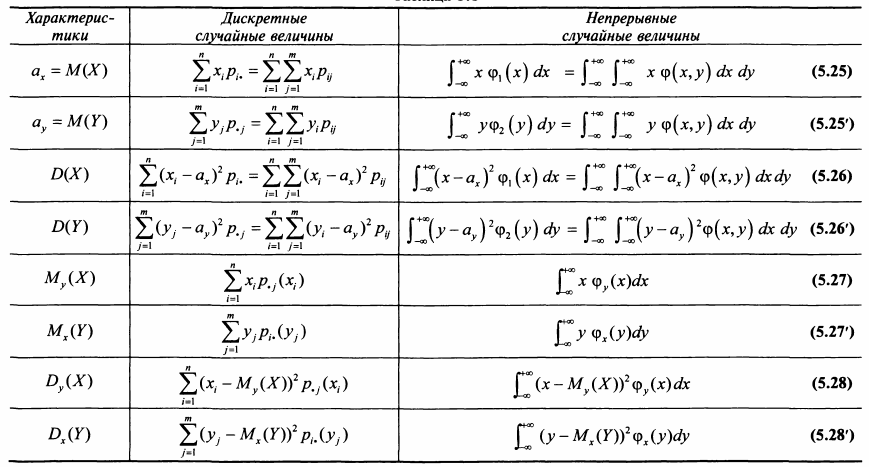
***

Основные типы распределений - см. __`appstat_04.ipynb`__